In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import calculate_observables as obs
from processing.kinematics import normalize_dPhi, phi, mass, eta
from ttbar_reconstruction import four_momentum

plt.style.use("seaborn-whitegrid")

In [2]:
base_path = "../reconstructions/SM_spin-ON_100k"
reco_names = [
    "p_top", "p_l_t", "p_b_t", "p_nu_t",
    "p_tbar", "p_l_tbar", "p_b_tbar", "p_nu_tbar", "idx", "weight"
]
batches = {name: [] for name in reco_names}
for batch_idx in range(10):
    for name in reco_names:
        batches[name].append(np.load(os.path.join(base_path, f"{name}_batch_{batch_idx}.npy")))

arrays = {name: np.concatenate(batches, axis=0) for name, batches in batches.items()}

## ATLAS Results
### $\Delta \phi(l^{+}, l^{-})$

+ m_tt < 450 GeV
+ 450 < m_tt < 550 
+ 550 < m_tt < 800
+ m_tt > 800

In [3]:
phi_l_t = phi(arrays["p_l_t"])
phi_l_tbar = phi(arrays["p_l_tbar"])
dPhi_ll = normalize_dPhi(phi_l_tbar - phi_l_t).reshape(-1, 1)

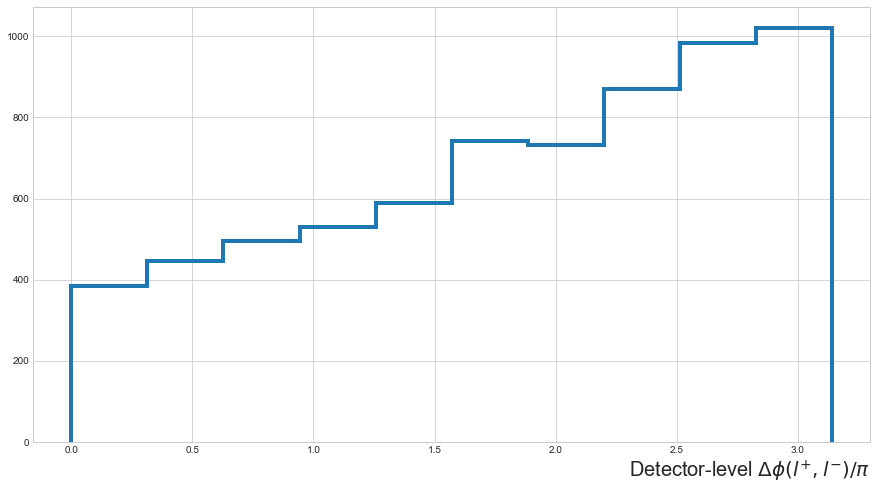

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor("white")
ax.hist(dPhi_ll, histtype="step", linewidth=4)
ax.set_xlabel(
    u"Detector-level $\Delta\phi(l^{+}, l^{-})/\pi$",
    fontsize=20,
    horizontalalignment='right',
    x=1.0
);

### $m_{t\bar{t}}$

In [5]:
m_tt = mass(arrays["p_top"]) + mass(arrays["p_tbar"])

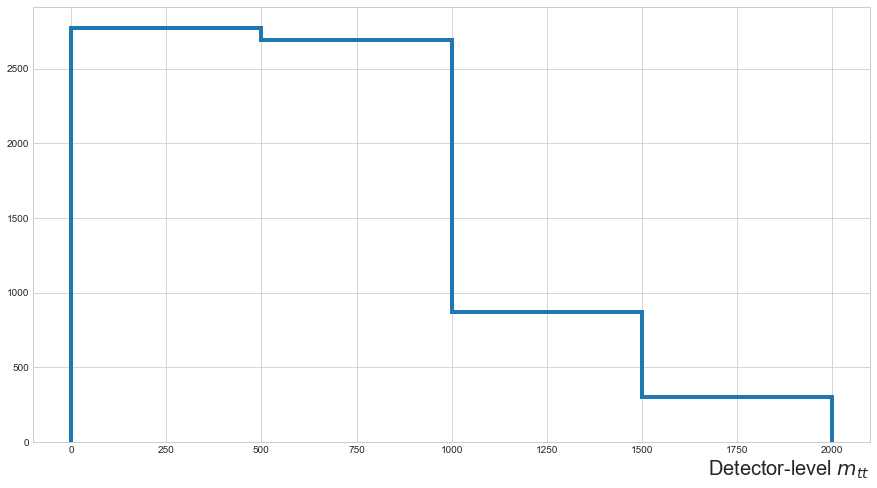

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor("white")
ax.hist(m_tt, histtype="step", linewidth=4, bins=4, range=(0, 2000))
ax.set_xlabel(
    u"Detector-level $m_{t\t}$",
    fontsize=20,
    horizontalalignment='right',
    x=1.0
);

### Binned $\Delta \phi(l^{+}, l^{-})$

+ m_tt < 450 GeV
+ 450 < m_tt < 550 
+ 550 < m_tt < 800
+ m_tt > 800

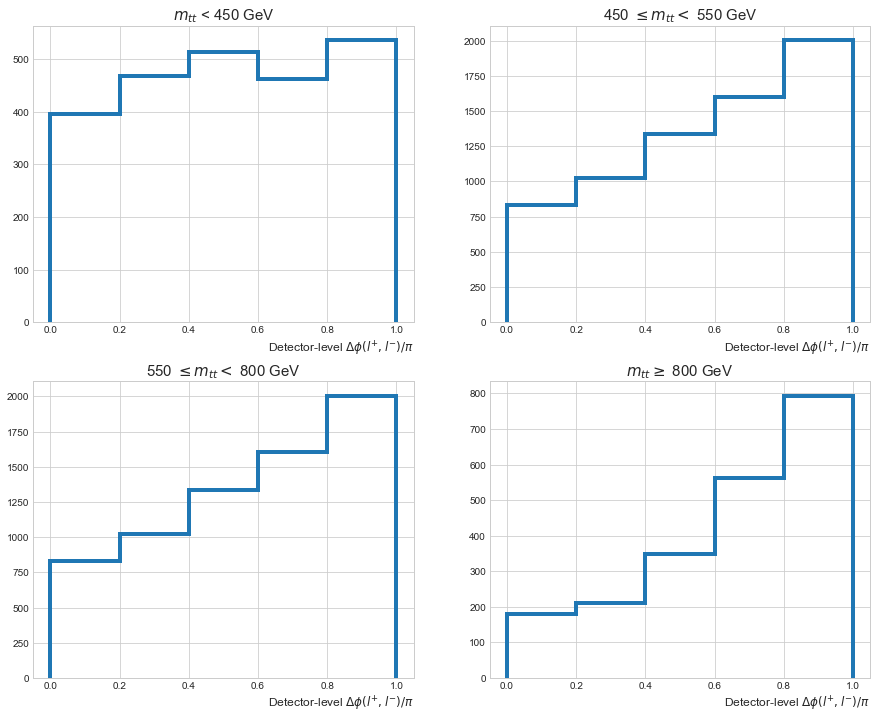

In [7]:
masks = {
    "x<450": m_tt < 450,
    "450<x<550": (450 <= m_tt) + (m_tt < 550),
    "550<x<800": (550 <= m_tt) + (m_tt < 800),
    "x>800": m_tt > 800
}

titles = {
    "x<450": u"$m_{tt}$ < 450 GeV",
    "450<x<550": u"450 $\leq m_{tt} <$ 550 GeV",
    "550<x<800": u"550 $\leq m_{tt} <$ 800 GeV",
    "x>800": u"$m_{tt} \geq$ 800 GeV"
}

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.set_facecolor("white")
for idx, (name, mask) in enumerate(masks.items()):
    x = idx // 2
    y = idx % 2
    ax[x, y].hist(dPhi_ll[mask] / np.pi, bins=5, histtype="step", linewidth=4)
    ax[x, y].set_xlabel(
        u"Detector-level $\Delta\phi(l^{+}, l^{-})/\pi$",
        fontsize=12,
        horizontalalignment='right',
        x=1.0
    )
    ax[x, y].set_title(titles[name], fontsize=15)

### $\Delta \eta(l^{+}, l^{-})$

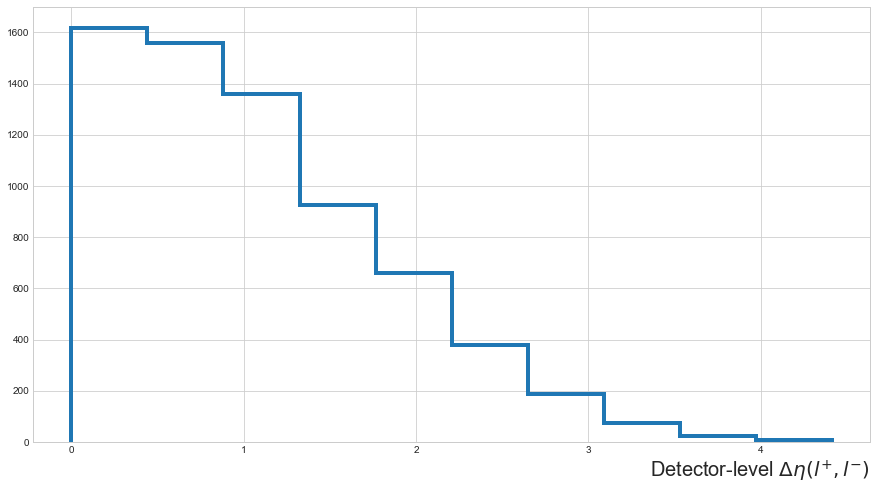

In [8]:
eta_l_t = eta(arrays["p_l_t"])
eta_l_tbar = eta(arrays["p_l_tbar"])
dEta_ll = np.abs(eta_l_tbar - eta_l_t).reshape(-1, 1)

fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor("white")
ax.hist(dEta_ll, histtype="step", linewidth=4)
ax.set_xlabel(
    u"Detector-level $\Delta\eta(l^{+}, l^{-})$",
    fontsize=20,
    horizontalalignment='right',
    x=1.0
);

## CMS Plots

In [9]:
obs_dict = obs.obs_matrix(arrays["p_l_t"], arrays["p_l_tbar"], arrays["p_top"], arrays["p_tbar"])

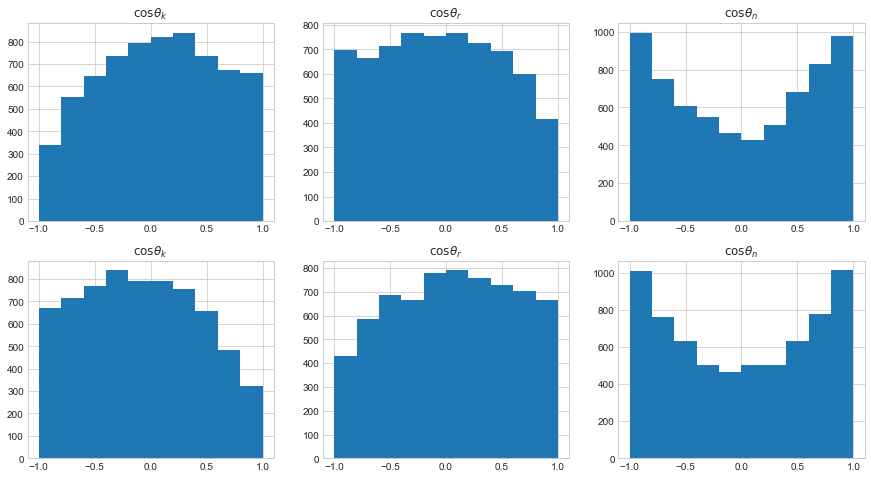

In [10]:
fig, ax = plt.subplots(figsize=(15, 8), nrows=2, ncols=3)
for i in range(2):
    ax[i, 0].hist(obs_dict[f"cos_k{i + 1}"])
    ax[i, 0].set_title(r"$\cos \theta_k$")
    ax[i, 1].hist(obs_dict[f"cos_r{i + 1}"])
    ax[i, 1].set_title(r"$\cos \theta_r$")
    ax[i, 2].hist(obs_dict[f"cos_n{i + 1}"])
    ax[i, 2].set_title(r"$\cos \theta_n$")